In [7]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from InterneuronPool import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [8]:
conf = Configuration('confReciprocalInhibition.rmto')
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [9]:
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
pools[3]= AfferentPool(conf,'Ia', 'TA')
pools[4] = InterneuronPool(conf, 'IaIn', 'ext')
Syn = SynapsesFactory(conf, pools)
del Syn 

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
Afferent Pool Ia of muscle TA built
Interneuron Pool of IaIn ext built
All the 506729 synapses were built
All the 0 synaptic noises were built


In [10]:
tic = time.time()
for i in xrange(0, len(t)-1):
    pools[0].atualizeMotorUnitPool(t[i])
    pools[1].atualizeAfferentPool(t[i], 0)
    pools[2].atualizeAfferentPool(t[i], 0)
    pools[3].atualizeAfferentPool(t[i], 0)
    pools[4].atualizeInterneuronPool(t[i])
toc = time.time()
print str(toc - tic) + ' seconds'

2283.97533178 seconds


In [11]:
pools[0].getMotorUnitPoolEMG()

<IPython.core.display.Javascript object>


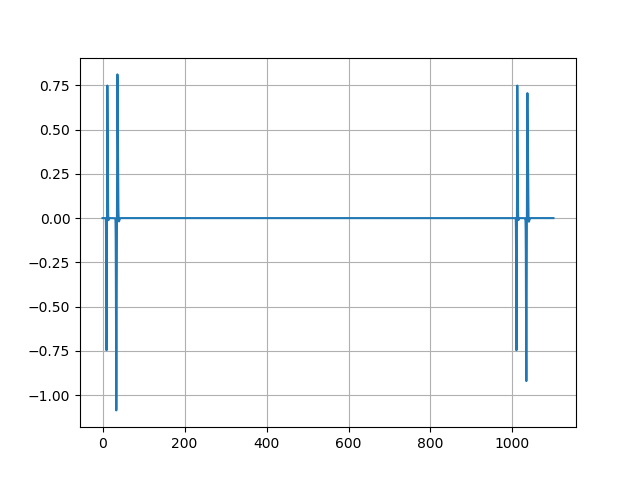

In [12]:
plt.figure()
plt.plot(t,pools[0].emg)
plt.grid()

<IPython.core.display.Javascript object>


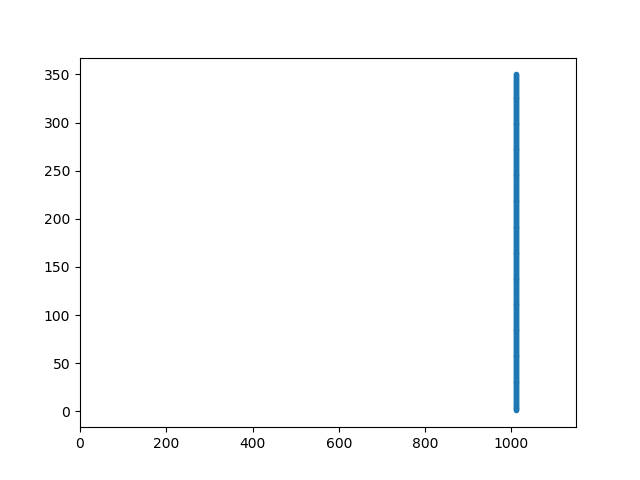

(0, 1150)

In [13]:
pools[4].listSpikes()
plt.figure()
plt.plot(pools[4].poolSomaSpikes[:, 0],
         pools[4].poolSomaSpikes[:, 1]+1, '.')
plt.xlim([0, 1150])